### Artificial Neural Networks - With Fashions of MNIST Dataset

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualization Liraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evoluation Libraries 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep Learning Libraries 
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_train=pd.read_csv('fashion-mnist_train.csv')
fashion_test=pd.read_csv('fashion-mnist_test.csv')

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
fashion_test.shape

(10000, 785)

In [5]:
x_train_fashion = fashion_train.drop('label', axis=1)
y_train_fashion = fashion_train['label']
x_test_fashion = fashion_test.drop('label', axis=1)
y_test_fashion = fashion_test['label']

In [6]:
#Reshapping the Dataset
x_train_reshape = x_train_fashion.values.reshape(-1,28,28)
x_test_reshape = x_test_fashion.values.reshape(-1,28,28)

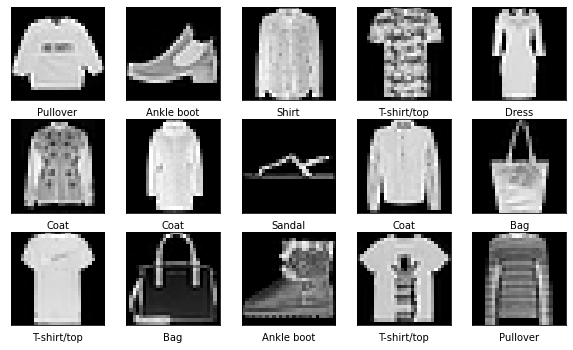

In [7]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [8]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

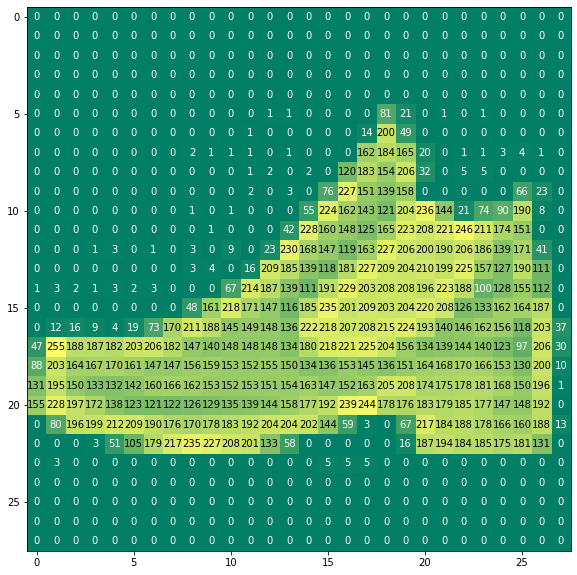

In [9]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[1], ax)
plt.show()

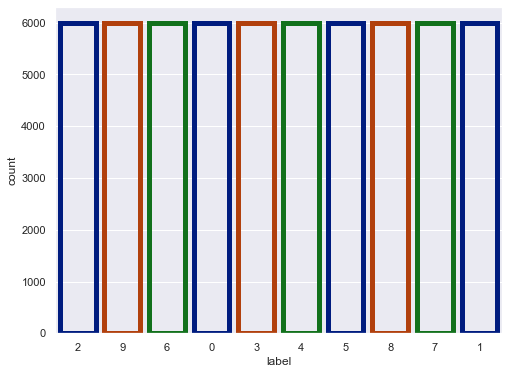

In [10]:
#To Check whether the labels of the MNIST dataset are Balanced or not

#Setting plot size
sns.set(rc={'figure.figsize':(8,6)})

#Getting dataframe data
mnist=pd.read_csv("fashion-mnist_train.csv")

#Countplot
ax = sns.countplot(x="label", data=mnist,                #Graph shows data has exactly 6000 records for each labels
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3),
                   order = mnist['label'].value_counts().index)

In [11]:
y_train_fashion[0]

2

In [12]:
y_test_fashion[0]

0

In [13]:
#Encoding Fashion MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)


In [14]:
 y_train_fashion[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_test_fashion[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                        

In [18]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


In [20]:
#Fitting the model
# model.fit(x_train_fashion, y_train_fashion, batch_size=100, epochs=10)
history=model.fit(x_train_fashion, y_train_fashion,batch_size=100,epochs=10,validation_data=(x_train_fashion, y_train_fashion))  

Epoch 1/10
600/600 [==============================] - 8s 11ms/step - loss: 1.1241 - accuracy: 0.6253 - val_loss: 0.5748 - val_accuracy: 0.8160
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.7440 - accuracy: 0.7465 - val_loss: 0.4785 - val_accuracy: 0.8398
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6723 - accuracy: 0.7756 - val_loss: 0.4570 - val_accuracy: 0.8376
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6326 - accuracy: 0.7881 - val_loss: 0.4212 - val_accuracy: 0.8547
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6062 - accuracy: 0.7969 - val_loss: 0.4231 - val_accuracy: 0.8577
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.5913 - accuracy: 0.8038 - val_loss: 0.4218 - val_accuracy: 0.8581
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.5730 - accuracy: 0.8091 - val_loss: 0.4279 - val_accuracy: 0.8685
Epoch

In [21]:
#Evaluating fashion MNIST test accuracy
test_loss_fashion, test_acc_fashion = model.evaluate(x_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 2ms/step - loss: 0.4108 - accuracy: 0.8558


In [22]:
#Printing the test accuracy results
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8558


In [23]:
#Predicting the lables-Fashion
y_predict = model.predict(x_test_fashion)
y_predicts = np.argmax(y_predict,axis=1)   #Here we get the index of maximum value in the encoded vector,  #Predicted Answer
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)    # Actual Answer

313/313 [==============================] - 1s 2ms/step


In [24]:
y_predict

array([[7.25623786e-01, 1.47848332e-03, 9.42642801e-03, ...,
        2.46929179e-04, 1.41108956e-03, 1.25265375e-04],
       [1.98068312e-10, 1.00000000e+00, 1.11737654e-10, ...,
        1.64686390e-11, 1.16786442e-10, 3.45800680e-11],
       [6.82051899e-03, 5.33131126e-04, 7.17504561e-01, ...,
        7.27667357e-05, 2.59696180e-03, 3.73724150e-04],
       ...,
       [5.74183999e-11, 1.68762625e-11, 4.06414347e-10, ...,
        1.89102920e-07, 9.99999762e-01, 3.41402628e-10],
       [2.26202738e-02, 2.41210894e-03, 1.65095422e-02, ...,
        1.06933527e-03, 9.06797409e-01, 8.77235900e-04],
       [1.39718677e-03, 9.92357671e-01, 6.91735186e-04, ...,
        2.32458406e-05, 1.29248976e-04, 6.50653164e-05]], dtype=float32)

In [25]:
y_predicts

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [26]:
y_test_fash_eval

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [27]:
y_pred=pd.DataFrame(y_predicts)

In [28]:
y_pred.head()

,0
0,0
1,1
2,2
3,6
4,3


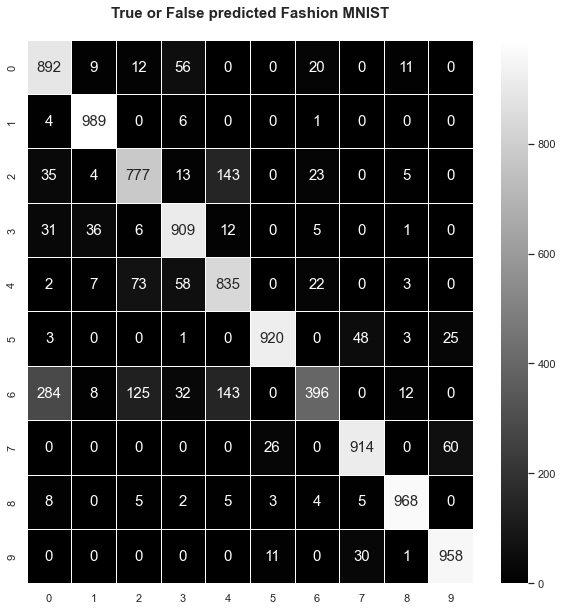

In [29]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test_fash_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1000
           1       0.94      0.99      0.96      1000
           2       0.78      0.78      0.78      1000
           3       0.84      0.91      0.88      1000
           4       0.73      0.83      0.78      1000
           5       0.96      0.92      0.94      1000
           6       0.84      0.40      0.54      1000
           7       0.92      0.91      0.92      1000
           8       0.96      0.97      0.97      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


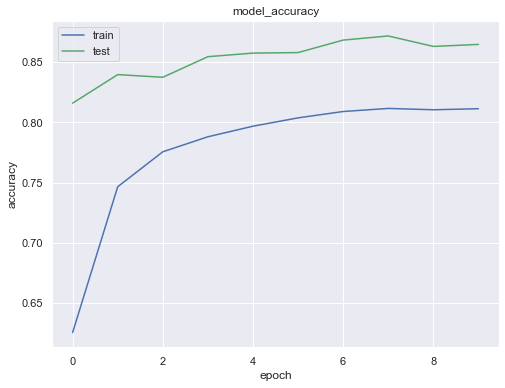

In [32]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

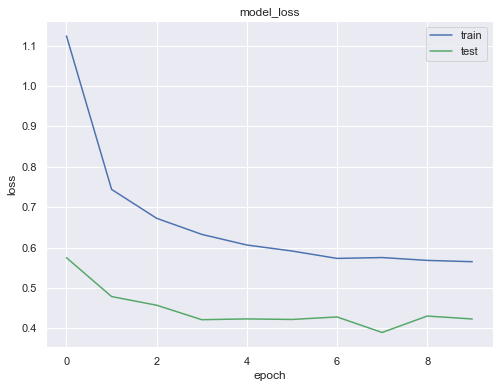

In [33]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [34]:
y_pred.tail()

,0
9995,0
9996,6
9997,8
9998,8
9999,1



Enter Test Sets Row Numbers Between 0-9999: 9997

For the Row of 9997 The Array format of Test Fashion is: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

Order of Fashions for Array(0-9) is: [T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot]


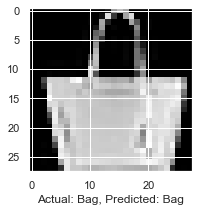

In [36]:
#Testing the Fashions

ui=int(input("\nEnter Test Sets Row Numbers Between 0-9999: "))

plt.figure(figsize=(3,3))
plt.imshow(x_test_reshape[ui], cmap='gray')

plt.xlabel('Actual: {}, Predicted: {}'.format(col_names[y_test_fash_eval[ui]],col_names[y_predicts[ui]]))
plt.show

print('\nFor the Row of {}'.format(ui) + ' The Array format of Test Fashion is: {}'.format(y_test_fashion[ui]) + '\n\nOrder of Fashions for Array(0-9) is: [T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot]')